# Domain: Social Network
Project 05: Facebook data
Dataset contains pseudo Facebook data.

Attribute Information:
Userid : ID of user
Age : User’s age(years)
dob_day : Day of date of birth(1-31)
dob_year : Year of date of birth 
dob_month : Month of date of birth 
gender : M/F
tenure : How long have facebook users been on site
friend_count : Total number of friends 
friendships_initiated : Friend requests sent
likes : Total number of likes by user
likes_received : Total number of likes received by user 
mobile_likes : Number of likes by user(through mobile)
mobile_likes_received : Number of likes recieved by user(through mobile) 
www_likes : Number of likes by user(through desktop website) 
www_likes_received : Number of likes received by user(through desktop)
    
Exploration ideas:
Date of birth analysis Friend count analysis
Tenure analysis
Data transformations
Frequency polygons, Boxplots.

In [1]:
#Import the necessary packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
%matplotlib inline

In [2]:
#Read the input file in variable facebook

path = 'C:/Manoj/Data Science/Foundation Projects/Facebook/pseudo_facebook.tsv'
facebook = pd.read_csv(path,sep='\t',parse_dates=[[3,4,2]])
facebook.tail()

,dob_year_dob_month_dob_day,userid,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98998,1945-04-04,1268299,68,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1995-03-12,1256153,18,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1998-05-10,1195943,15,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1990-04-11,1468023,23,female,416.0,2560,185,4506,6516,4506,5760,0,756
99002,1974-05-15,1397896,39,female,397.0,2049,768,9410,12443,9410,9530,0,2913


In [3]:
#facebook variable no of rows and columns
facebook.shape

(99003, 13)

In [4]:
#facebook variable column variables and data types
facebook.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 13 columns):
dob_year_dob_month_dob_day    99003 non-null datetime64[ns]
userid                        99003 non-null int64
age                           99003 non-null int64
gender                        98828 non-null object
tenure                        99001 non-null float64
friend_count                  99003 non-null int64
friendships_initiated         99003 non-null int64
likes                         99003 non-null int64
likes_received                99003 non-null int64
mobile_likes                  99003 non-null int64
mobile_likes_received         99003 non-null int64
www_likes                     99003 non-null int64
www_likes_received            99003 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(10), object(1)
memory usage: 9.8+ MB


In [5]:
#Renaming the date of birth coumn to shorter name as DOB and further setting index of te dataframe as userid

facebook.rename(columns = {'dob_year_dob_month_dob_day':'DOB'},inplace=True)
facebook = facebook.set_index('userid')
facebook.head()

,DOB,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
userid,,,,,,,,,,,,
2094382,1999-11-19,14,male,266.0,0,0,0,0,0,0,0,0
1192601,1999-11-02,14,female,6.0,0,0,0,0,0,0,0,0
2083884,1999-11-16,14,male,13.0,0,0,0,0,0,0,0,0
1203168,1999-12-25,14,female,93.0,0,0,0,0,0,0,0,0
1733186,1999-12-04,14,male,82.0,0,0,0,0,0,0,0,0


In [6]:
#Use describe function to see the various aspects of facebbok data

facebook.describe()

,age,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,99003.000000,99001.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000,99003.000000
mean,37.280224,537.887375,196.350787,107.452471,156.078785,142.689363,106.116300,84.120491,49.962425,58.568831
std,22.589748,457.649874,387.304229,188.786951,572.280681,1387.919613,445.252985,839.889444,285.560152,601.416348
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,50.000000,675.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,113.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [7]:
#Lets see the number of Males in the facebook data

males = (facebook['gender']=='male').sum()
males

58574

In [8]:
#No of Females in the facebook data

females = (facebook['gender']=='female').sum()
females

40254

In [9]:
#Lets find out the No. of like received by Females

likes = facebook.groupby('gender')[['likes_received']].sum()
flikes = likes.ix['female']

#And No. of like received by Males
mlikes = likes.ix['male']
print(mlikes)
print(flikes)

likes_received    3977851
Name: male, dtype: int64
likes_received    10121282
Name: female, dtype: int64


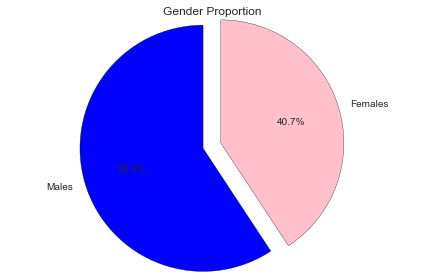

In [10]:
#Lets draw Pie chart for population proportion of males and females

percent_pop = [males,females]

plt.pie(
      percent_pop,
      labels = ['Males','Females'],
      shadow = False,
       colors = ['blue','pink'],
       explode = (0.15 , 0),
       startangle =30,
       autopct = '%1.1f%%'
)
plt.axis('equal')
plt.title("Gender Proportion")
plt.tight_layout()
plt.show()

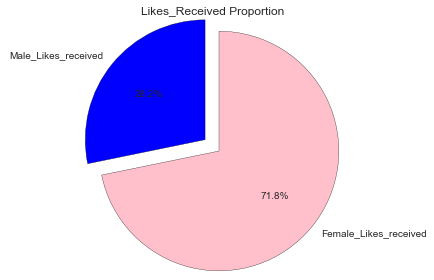

In [11]:
#As we saw the population proportion of males vs feamles, lets see the proportion of facebook likes for males vs females

percent_likes = [mlikes,flikes]

plt.pie(
      percent_likes,
      labels = ['Male_Likes_received','Female_Likes_received'],
      shadow = False,
       colors = ['blue','pink'],
       explode = (0.15 , 0),
       startangle = 90,
       autopct = '%1.1f%%'
)
plt.axis('equal')
plt.title("Likes_Received Proportion")
plt.tight_layout()
plt.show()

#Analysis :- So, we saw in spite of having the more percentage population proportion of males , the likes proportion of females is
#much higher than males..:) 


# Lets see how 'Likes_received' of a particular user vary wrt other parameters.

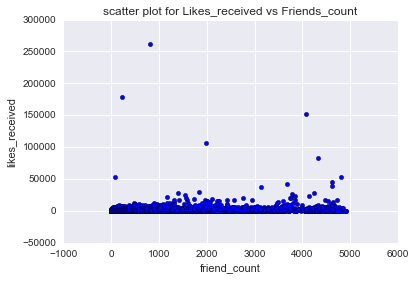

In [12]:
#Let's plot the scatter plot to see how no of likes is influenced by friend_count

plt.scatter(facebook['friend_count'],facebook['likes_received'])
plt.xlabel('friend_count')
plt.ylabel('likes_received')
plt.title('scatter plot for Likes_received vs Friends_count')

#Analysis - It seems there is no relation as such in specific between likes_received w.r.t friend_count.
# So, a general assumption of higher the friends higher will be likes doesnt seems to be correct at least by this plot.
# Although there are some specific outliers

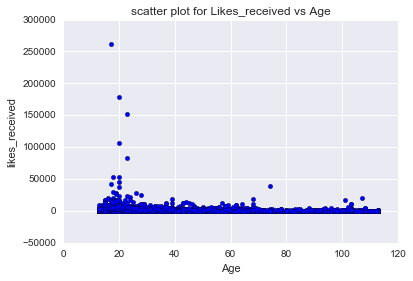

In [13]:
#Now Let's see how the likes_received are getting influenced by age of a person

plt.scatter(facebook['age'],facebook['likes_received'])
plt.xlabel('Age')
plt.ylabel('likes_received')
plt.title('scatter plot for Likes_received vs Age')

#Analysis - It looks like the distribution is little rightly skewed from 0-25 years of age and again no of likes are 
# increasing near 40 or so. Outliers in the plot are also present but their cocentration is more near 20 years of the age of
# user.

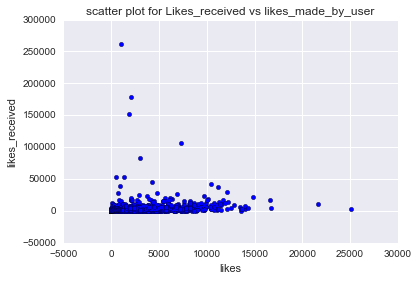

In [14]:
# Lets see whether user can increase his/her 'likes_received' if he starts liking other users status/pic more often.

plt.scatter(facebook['likes'],facebook['likes_received'])
plt.xlabel('likes')
plt.ylabel('likes_received')
plt.title('scatter plot for Likes_received vs likes_made_by_user')

#Analysis :- Seems to be similar with other prevous plots and looks like there is no sepcial increase in likes_received
# even if user is liking other user profile/picture...wonder if its correct, I always thought the other way round...:)
# Although some outliers justifies that for having a high number of likes received one doesn't have to like more
# of others stuff.. :)

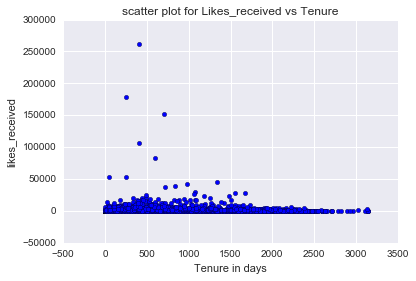

In [15]:
#Now last in this category, lets see how likes_received vary with the amount of tenure a user sepnts in facebook

plt.scatter(facebook['tenure'],facebook['likes_received'])
plt.xlabel('Tenure in days')
plt.ylabel('likes_received')
plt.title('scatter plot for Likes_received vs Tenure')

#Analysis :- The plot below is similar to little rightly skewed and it seems likes_received
#increases till first 300-500 days and then it starts decreasing. Outliers in this plot too are concentrated
# near the right skew peak. This proves that general assumption of having more number of likes is more likely to 
# happen if the user's tenure is high in facebook is not true. Because one can see even if user has spent max. tenure
# say more than 1500 days, his likes are lesses than the one who has only spent 500 days in facebook.

# How 'Friends_count' of a particular user vary wrt other parameters.

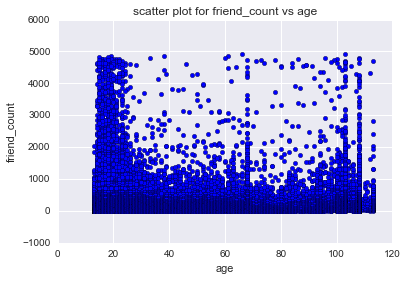

In [16]:
#Lets plot to see if there is any relation between friend_count & Age of a user.

plt.scatter(facebook['age'],facebook['friend_count'])
plt.xlabel('age')
plt.ylabel('friend_count')
plt.title('scatter plot for friend_count vs age')

#Analysis :- Again as rest of the plots, the no of friend_count vs age plot looks rightly skewed, chances of having more 
# friends if he is in age grup till 20-25 is high than as compared to later age groups. Although for every age there
# are some very high number of outliers.And one interesting fact, at intervals around 100 years or 110 years of age
# frind_count is gain at its peak.

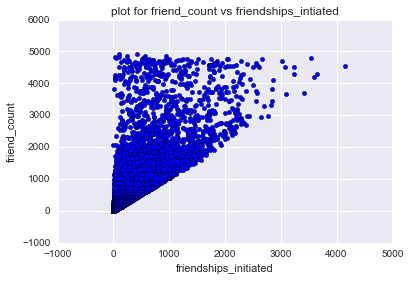

In [17]:
#Lets plot to see how the plot is for friend_count & friendship_initiated for users.

plt.scatter(facebook['friendships_initiated'],facebook['friend_count'])
plt.xlabel('friendships_initiated')
plt.ylabel('friend_count')
plt.title('plot for friend_count vs friendships_intiated')

#Analysis :- This plot looks different, to some extent it seems friend_count has been directly proportional(atleast to 
# some extent) to no of riend_requests sent, as more the friendships one has initiated, his/her friend count 
# has always increased.

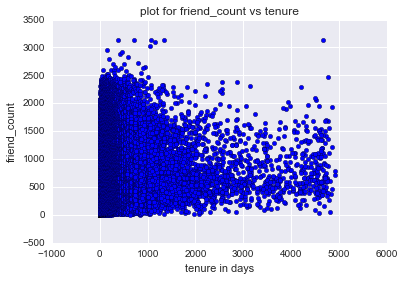

In [18]:
#Lets see one last to check how fiend_count vary w.r.t tenure of a user

plt.scatter(facebook['friend_count'],facebook['tenure'])
plt.xlabel('tenure in days')
plt.ylabel('friend_count')
plt.title('plot for friend_count vs tenure')

#Analysis :- This plot again seems to me a blurred example of right skewed distribution, it seems till the tenure of 1000
#days, friend_count is increasing & is at peaks.And for all the user whose tenure is incresing there is surge in friends count...

# Facebook Correlation Matrix

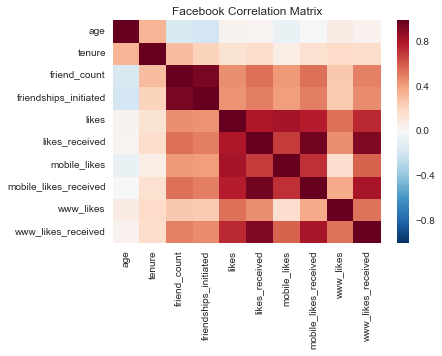

In [19]:
# Lets draw the correlation matrix to see the correlation impact of each attribute with each other.

corr=facebook.corr(method='spearman')
%matplotlib inline
plt.title('Facebook Correlation Matrix')
sns.heatmap(corr)

#Analysis :- So, from the below we can make out that there is a positive co=relation between Friend_count & friend_ships
# initiated & similary we have positive correlation for various likes received/given with total number of likes.
# Another interesting aspect is friend_count/friendships_initiated is in near to negative correlation with age, this
# is what we have also seen in the above plots as well...(Like wise we csn do other investigations as well)

# Some other calculations & many more to add.....

In [20]:
# Max number of likes received & friends_count for a particular age (males and females)

max_likes = facebook.groupby(['age','gender'])[['likes_received','friend_count']].max()
max_likes.head()

likes_received  friend_count
age gender                              
13  female            9919          2028
    male              2125           732
14  female            8581          4641
    male              4583          3463
15  female           17066          4826

In [21]:
# Will be very interesting to create gender specific graphs against the same index, to see how for particular gender
# plot is getting influenced by particualar factors.

In [22]:
#Please suggest in case i am wrong or to add any!!

In [23]:
# The above plots are very generic and simple in nature but for next stage, visualization has to be done for more 
# complex/complicated use cases, so that some hidden/interesting facts can be found out...

In [25]:
# Data Transformation is required as there will be numerous age values and need to put in respective group to help 
# analyze Age related factors better

def age_compute(row):
    if row['age'] < 20:
        return '13-19'
    elif row['age'] >= 20 and row['age'] < 40:
        return '20-39'
    elif row['age'] >= 40 and row['age'] < 60:
        return '40-60'
    elif row['age'] >= 60:
        return '60 Plus'

facebook['age_group'] = facebook.apply(age_compute,axis=1)

facebook.tail()

,DOB,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
userid,,,,,,,,,,,,,
1268299,1945-04-04,68,female,541.0,2118,341,3996,18089,3505,11887,491,6202,60 Plus
1256153,1995-03-12,18,female,21.0,1968,1720,4401,13412,4399,10592,2,2820,13-19
1195943,1998-05-10,15,female,111.0,2002,1524,11959,12554,11959,11462,0,1092,13-19
1468023,1990-04-11,23,female,416.0,2560,185,4506,6516,4506,5760,0,756,20-39
1397896,1974-05-15,39,female,397.0,2049,768,9410,12443,9410,9530,0,2913,20-39


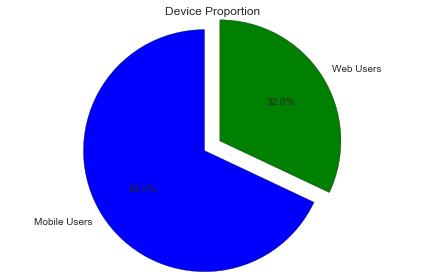

In [26]:
#Determine how many people are using Mobile over Web for accessing facebook

mobile_usage = (facebook['mobile_likes']).sum()
web_usage = (facebook['www_likes']).sum()
mobile_usage
web_usage

percent_pop = [mobile_usage,web_usage]

plt.pie(
      percent_pop,
      labels = ['Mobile Users','Web Users'],
      shadow = False,
       #colors = ['blue','pink'],
       explode = (0.15 , 0),
       startangle = 90,
       autopct = '%1.1f%%'
)
plt.axis('equal')
plt.title("Device Proportion")
plt.tight_layout()
plt.show()

# It is found that overall population is using more and more mobile than web for accessing facebook
# Now lets see how it differs from age point of view 

In [37]:
# Now lets see which age group is using mobile more than others

facebook_age_group = facebook.groupby('age_group').sum()
facebook_age_group

,age,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
age_group,,,,,,,,,,
13-19,354656,7560443.0,6896020,3686243,4476398,4950479,2988598,2907837,1487799,2042639
20-39,1188387,18940954.0,7159036,4177747,5691456,5621580,4305923,3479168,1385530,2142412
40-60,912183,11624613.0,1942526,1084989,2920135,1927115,1905805,1048151,1014328,878964
60 Plus,1235628,15125378.0,3441735,1689138,2364279,1627501,1305506,893025,1058773,734475


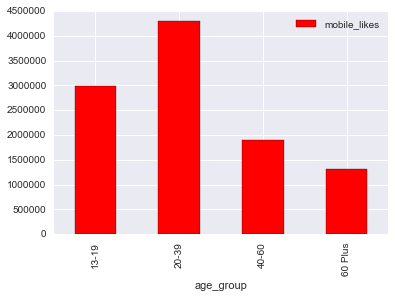

In [38]:
facebook_age_group.plot(facebook_age_group.index, 'mobile_likes', kind='bar', color='r')

# As expected young population of 20-39 range are using facebook through mobile more than others